# MNIST Classification 


In this lesson we discuss in how to create a simple IPython Notebook to solve
an image classification problem. MNIST contains a set of pictures


## Import Libraries 

Note: https://python-future.org/quickstart.html

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

## Warm Up Exercise

## Pre-process data

### Load data 

First we load the data from the inbuilt mnist dataset from Keras
Here we have to split the data set into training and testing data. 
The training data or testing data has two components. 
Training features and training labels. 
For instance every sample in the dataset has a corresponding label. 
In Mnist the training sample contains image data represented in terms of 
an array. The training labels are from 0-9. 

Here we say x_train for training data features and y_train as the training labels. Same goes for testing data. 

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### Identify Number of Classes

As this is a number classification problem. We need to know how many classes are there. 
So we'll count the number of unique labels. 

In [ ]:
num_labels = len(np.unique(y_train))
print(num_labels)
num_features = len(np.unique(x_train))
print(num_features)

10
256


### Convert Labels To One-Hot Vector

Read more on one-hot vector. 

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## Image Reshaping

The training model is designed by considering the data as a vector.
This is a model dependent modification. Here we assume the image is
a squared shape image.

In [ ]:
image_size = x_train.shape[1]
input_size = image_size * image_size

## Resize and Normalize

The next step is to continue the reshaping to a fit into a vector
and normalize the data. Image values are from 0 - 255, so an 
easy way to normalize is to divide by the maximum value. 


In [ ]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

## Create a Keras Model

Keras is a neural network library. The summary function provides tabular summary on the model you created. And the plot_model function provides a grpah on the network you created. 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


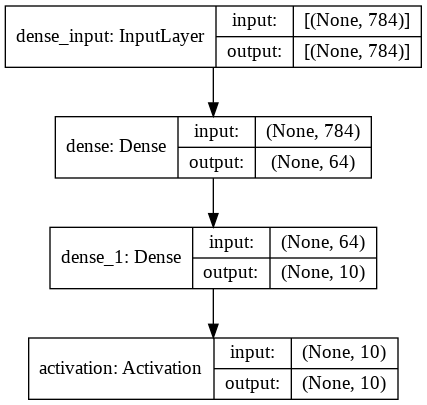

In [ ]:
# Create Model
# network parameters
batch_size = 4
hidden_units = 64

model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

## Compile and Train

A keras model need to be compiled before it can be used to train
the model. In the compile function, you can provide the optimization
that you want to add, metrics you expect and the type of loss function
you need to use. 

Here we use adam optimizer, a famous optimizer used in neural networks. 

The loss funtion we have used is the categorical_crossentropy. 

Once the model is compiled, then the fit function is called upon passing the number of epochs, traing data and batch size. 

The batch size determines the number of elements used per minibatch in optimizing the function. 

**Note: Change the number of epochs, batch size and see what happens.**



In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Define different epochs and batch sizes for assessment
epoch_list = [5,10,20,50]
batch_size_list = [4,16,32,64,128]

# Loop 1: display results of training model for different epochs but fixed batch size  
for i in epoch_list:
  print("\nTraining for", i,"epochs at batch size", batch_size,":")
  model.fit(x_train, y_train, epochs=i, batch_size=batch_size)
  loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
  print("Test accuracy at",i,"epochs and batch size",batch_size,": %.2f%%" % (100.0 * acc))

# Loop 2: display results of training model for fixed epochs but different batch sizes 
for j in batch_size_list:
  print("\nTraining for 5 epochs at batch size", j,":")
  model.fit(x_train, y_train, epochs=5, batch_size=j) 
  loss, acc = model.evaluate(x_test, y_test, batch_size=j)
  print("Test accuracy after 5 epochs and batch size",j,": %.2f%%" % (100.0 * acc))


Training for 5 epochs at batch size 4 :
Epoch 1/5
15000/15000 [==============================] - 17s 1ms/step - loss: 0.4416 - accuracy: 0.8717
Epoch 2/5
15000/15000 [==============================] - 17s 1ms/step - loss: 0.3176 - accuracy: 0.9111
Epoch 3/5
15000/15000 [==============================] - 17s 1ms/step - loss: 0.2990 - accuracy: 0.9164
Epoch 4/5
15000/15000 [==============================] - 17s 1ms/step - loss: 0.2975 - accuracy: 0.9167
Epoch 5/5
2500/2500 [==============================] - 2s 747us/step - loss: 0.2974 - accuracy: 0.9194
Test accuracy at 5 epochs and batch size 4 : 91.94%

Training for 10 epochs at batch size 4 :
Epoch 1/10
15000/15000 [==============================] - 17s 1ms/step - loss: 0.2870 - accuracy: 0.9202
Epoch 2/10
15000/15000 [==============================] - 17s 1ms/step - loss: 0.2838 - accuracy: 0.9201
Epoch 3/10
15000/15000 [==============================] - 17s 1ms/step - loss: 0.2820 - accuracy: 0.9207
Epoch 4/10
15000/15000 [=======

## Testing 

Now we can test the trained model. Use the evaluate function by passing
test data and batch size and the accuracy and the loss value can be retrieved.

**MNIST_V1.0|Exercise: Try to observe the network behavior by changing the number of epochs, batch size and record the best accuracy that you can gain. Here you can record what happens when you change these values. Describe your observations in 50-100 words.**


In [ ]:
# Assess for best accuracy gained by varying epochs and batch sizes
best_accuracy = 0
# Loop through different epochs and batch sizes
for i in epoch_list:
  for j in batch_size_list:
    print("Assessing accuracy at",i,"epochs of training and batch size:",j)
    model.fit(x_train, y_train, epochs=i, batch_size=j)
    loss, acc = model.evaluate(x_test, y_test, batch_size=j)
    #Assess and record for best accuracy
    if acc > best_accuracy:
      best_accuracy = acc
      optimum_batch_size = j
      optimum_epochs = i
      loss_at_optimum = loss
    print("Intermediate best accuracy is currently: %.2f%%" % (100.0 * best_accuracy),"after",optimum_epochs,"epochs","at batch size of",optimum_batch_size,"\n") 
print("\nFinal result: Best accuracy is %.2f%%" % (100.0 * best_accuracy),"after",optimum_epochs,"epochs","at batch size of",optimum_batch_size,"\n") 

Assessing accuracy at 5 epochs of training and batch size: 4
Epoch 1/5
15000/15000 [==============================] - 19s 1ms/step - loss: 0.2518 - accuracy: 0.9281
Epoch 2/5
15000/15000 [==============================] - 18s 1ms/step - loss: 0.2486 - accuracy: 0.9301
Epoch 3/5
15000/15000 [==============================] - 19s 1ms/step - loss: 0.2487 - accuracy: 0.9293
Epoch 4/5
15000/15000 [==============================] - 18s 1ms/step - loss: 0.2490 - accuracy: 0.9304
Epoch 5/5
2500/2500 [==============================] - 2s 817us/step - loss: 0.3239 - accuracy: 0.9182
Intermediate best accuracy is currently: 91.82% after 5 epochs at batch size of 4 

Assessing accuracy at 5 epochs of training and batch size: 16
Epoch 1/5
3750/3750 [==============================] - 6s 2ms/step - loss: 0.2295 - accuracy: 0.9369
Epoch 2/5
3750/3750 [==============================] - 6s 2ms/step - loss: 0.2306 - accuracy: 0.9362
Epoch 3/5
3750/3750 [==============================] - 6s 2ms/step - los

## Final Note

This programme can be defined as a hello world programme in deep
learning. Objective of this exercise is not to teach you the depths of
deep learning. But to teach you basic concepts that may need to design a
simple network to solve a problem. Before running the whole code, read
all the instructions before a code section. 

## Homework

**Solve Exercise MNIST_V1.0.**

# Observations 

Increasing epochs for training the neural network resulted in a general decrease in loss and increase in accuracy *of the model fit function*. Propagating more cycles of training through the network optimized weights in the model, yielding reductions in loss and gains in accuracy on training data. A similar trend was observed with increasing the batch sizes used. 

Best accuracy of the model on test data was on a batch size of about 64 at 5 or 10 epochs. This could be because variance in the test data was more in line with the less optimized model at lower epochs. 


### Reference: 

[Orignal Source to Source Code](https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras)
